**Fashion MNIST Classification with CNN in Python**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Define the class names for Fashion MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [ ]:
# Step 1: Load the data
print("Loading data...")
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

Loading data...


In [ ]:
# Step 2: Prepare the data
X_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(train_data['label'].values, 10)

X_test = test_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = to_categorical(test_data['label'].values, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [ ]:
# Step 3: Build the 6-layer CNN model
print("\nBuilding 6-layer CNN model...")
model = Sequential([
    # Layer 1: Conv + Pooling
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Layer 2: Conv + Pooling
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Layer 3: Conv + Pooling
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Layer 4: Flatten
    Flatten(),

    # Layer 5: Dense with Dropout
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Layer 6: Output
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Building 6-layer CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Train the model
print("\nTraining the model...")
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=10,  # Reduced for quicker execution
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Training the model...
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 103ms/step - accuracy: 0.6778 - loss: 0.9002 - val_accuracy: 0.8680 - val_loss: 0.3715
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 87s 104ms/step - accuracy: 0.8548 - loss: 0.4112 - val_accuracy: 0.8863 - val_loss: 0.3159
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 141s 102ms/step - accuracy: 0.8774 - loss: 0.3421 - val_accuracy: 0.8987 - val_loss: 0.2791
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 141s 102ms/step - accuracy: 0.8908 - loss: 0.3057 - val_accuracy: 0.9043 - val_loss: 0.2708
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 103ms/step - accuracy: 0.9016 - loss: 0.2740 - val_accuracy: 0.9100 - val_loss: 0.2569
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 141s 102ms/step - accuracy: 0.9096 - loss: 0.2510 - val_accuracy: 0.9133 - val_loss: 0.2403
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 142s 102ms/step - accuracy: 0.9177 - loss: 0.2284 - val_accuracy: 0.9207 - val_loss: 0.2368
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 103ms/step

In [ ]:
# Step 5: Evaluate the model
print("\nEvaluating the model...")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Evaluating the model...
Test Accuracy: 0.9185
Test Loss: 0.2324


In [ ]:
# Step 6: Plot training history
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

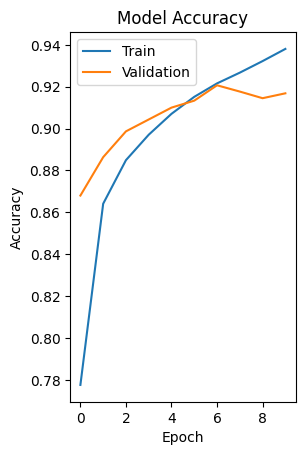

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


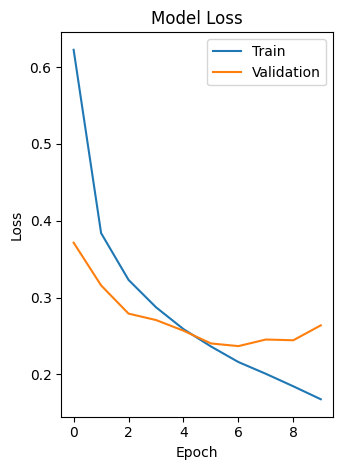

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()


In [ ]:
# Step 7: Make predictions for at least 2 images
print("\nMaking predictions...")
num_samples = 5  # We'll visualize 5 samples (more than the required 2)


Making predictions...


In [ ]:
# Select random samples from test set
sample_indices = np.random.choice(len(X_test), num_samples)

plt.figure(figsize=(15, num_samples * 3))
for i, idx in enumerate(sample_indices):
    img = X_test[idx]
    true_label = np.argmax(y_test[idx])

<Figure size 1500x1500 with 0 Axes>

In [ ]:
 # Make prediction
pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
pred_label = np.argmax(pred)
confidence = np.max(pred)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

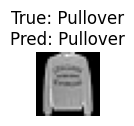

In [ ]:
 # Plot image
plt.subplot(num_samples, 2, 2*i+1)
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
plt.axis('off')

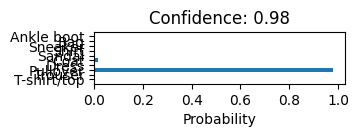

In [ ]:
 # Plot probabilities
plt.subplot(num_samples, 2, 2*i+2)
plt.barh(class_names, pred[0])
plt.xlabel('Probability')
plt.title(f'Confidence: {confidence:.2f}')
plt.tight_layout()
plt.savefig('predictions.png')
plt.show()

In [ ]:
# Step 8: Save the model
model.save('fashion_mnist_cnn.h5')
print("Model saved as 'fashion_mnist_cnn.h5'")

print("\nDone! Check the output files: 'training_history.png' and 'predictions.png'")

Model saved as 'fashion_mnist_cnn.h5'

Done! Check the output files: 'training_history.png' and 'predictions.png'
